In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [22]:
def normalize(data, method='min-max'):
    
    """
    Computes statistics assuming each sample is a row.
    """
    
    if (method == 'min-max'):
        numerator = data - np.min(data, axis=0)
        denominator = np.max(data, axis=0) - np.min(data, axis=0)
        return numerator/denominator
    
    if (method == 'standardization'):
        numerator = data - np.mean(data, axis=0)
        denominator = np.std(data, axis=0)
        return numerator/denominator
    
def segregate_target(data):
    
    X = data[:, :-1]
    t = data[:, -1:]
    
    return X, t

def train_test_validation_split(X, t):
    
    X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.33, random_state=42)
    X_valid, X_test, t_valid, t_test = train_test_split(X_test, t_test, test_size=0.5, random_state=42)
    
    data = {
        'X_train': X_train,
        't_train': t_train,
        'X_valid': X_valid,
        't_valid': t_valid,
        'X_test': X_test,
        't_test': t_test
    }
    
    return data

def load_data(path):
    
    data = np.load(path)
    return data

In [23]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + (np.exp(-z)))
    ### END CODE HERE ###
    
    return s

In [24]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###
    
    return w, b

In [25]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)                                   # compute activation
    cost = (1/m)*np.sum(-((Y*np.log(A))+((1-Y)*np.log(1-A))))                                 # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1/m)*(np.dot(X, (A-Y).T))
    db = (1/m)*np.sum(A - Y)
    ### END CODE HERE ###
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [26]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [27]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0][i] = 0 if A[0][i] <= 0.5 else 1
        ### END CODE HERE ###
    
    return Y_prediction

In [28]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [45]:
data = load_data('data/data.npy')
X, t = segregate_target(data)
data = train_test_validation_split(X, t)
data['X_train'] = normalize(data['X_train']).T
data['t_train'] = data['t_train'].T
data['X_valid'] = normalize(data['X_valid']).T
data['t_valid'] = data['t_valid'].T
data['X_test'] = normalize(data['X_test']).T
data['t_test'] = data['t_test'].T
# train_set_x, train_set_y, test_set_x, test_set_y
d = model(data['X_train'], data['t_train'], data['X_test'], data['t_test'], num_iterations = 50000, learning_rate = 2.5, print_cost = True)
print(d['w'], d['b'])

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.325264
Cost after iteration 200: 0.244731
Cost after iteration 300: 0.200315
Cost after iteration 400: 0.171610
Cost after iteration 500: 0.151480
Cost after iteration 600: 0.136577
Cost after iteration 700: 0.125098
Cost after iteration 800: 0.115983
Cost after iteration 900: 0.108568
Cost after iteration 1000: 0.102415
Cost after iteration 1100: 0.097224
Cost after iteration 1200: 0.092783
Cost after iteration 1300: 0.088937
Cost after iteration 1400: 0.085572
Cost after iteration 1500: 0.082601
Cost after iteration 1600: 0.079955
Cost after iteration 1700: 0.077584
Cost after iteration 1800: 0.075444
Cost after iteration 1900: 0.073501
Cost after iteration 2000: 0.071730
Cost after iteration 2100: 0.070106
Cost after iteration 2200: 0.068611
Cost after iteration 2300: 0.067230
Cost after iteration 2400: 0.065950
Cost after iteration 2500: 0.064758
Cost after iteration 2600: 0.063646
Cost after iteration 2700: 0.062605
Cost

Cost after iteration 24700: 0.030159
Cost after iteration 24800: 0.030128
Cost after iteration 24900: 0.030097
Cost after iteration 25000: 0.030067
Cost after iteration 25100: 0.030036
Cost after iteration 25200: 0.030006
Cost after iteration 25300: 0.029976
Cost after iteration 25400: 0.029946
Cost after iteration 25500: 0.029917
Cost after iteration 25600: 0.029887
Cost after iteration 25700: 0.029858
Cost after iteration 25800: 0.029828
Cost after iteration 25900: 0.029799
Cost after iteration 26000: 0.029771
Cost after iteration 26100: 0.029742
Cost after iteration 26200: 0.029713
Cost after iteration 26300: 0.029685
Cost after iteration 26400: 0.029657
Cost after iteration 26500: 0.029629
Cost after iteration 26600: 0.029601
Cost after iteration 26700: 0.029573
Cost after iteration 26800: 0.029545
Cost after iteration 26900: 0.029518
Cost after iteration 27000: 0.029491
Cost after iteration 27100: 0.029464
Cost after iteration 27200: 0.029437
Cost after iteration 27300: 0.029410
C

Cost after iteration 49100: 0.025647
Cost after iteration 49200: 0.025636
Cost after iteration 49300: 0.025624
Cost after iteration 49400: 0.025613
Cost after iteration 49500: 0.025602
Cost after iteration 49600: 0.025591
Cost after iteration 49700: 0.025580
Cost after iteration 49800: 0.025568
Cost after iteration 49900: 0.025557
train accuracy: 99.12948857453755 %
test accuracy: 94.27312775330397 %
[[-4.1183152e+01]
 [-4.2927478e+01]
 [-4.5689710e+01]
 [ 4.1856935e-02]] 56.669241213994226


**Comment**: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test accuracy is 68%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier next week!

Also, you see that the model is clearly overfitting the training data. Later in this specialization you will learn how to reduce overfitting, for example by using regularization. Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

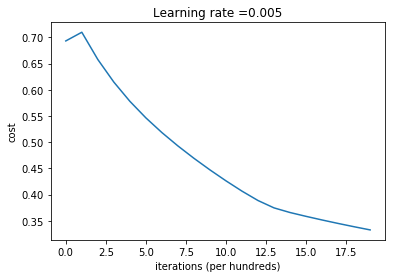

In [20]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()